In [1]:
from skimage import data, color, filters
import matplotlib.pyplot as plt

In [2]:
rocket = data.rocket()

In [71]:
def show_image(image, title='Image', cmap_type='gray'):
               plt.imshow(image, cmap=cmap_type)
               plt.title(title)
#                plt.axis()
               plt.show()
def plot_comparison(image1, image2):
    show_image(image1)
    show_image(image2)

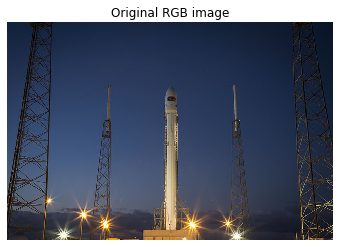

In [4]:
show_image(rocket, 'Original RGB image')

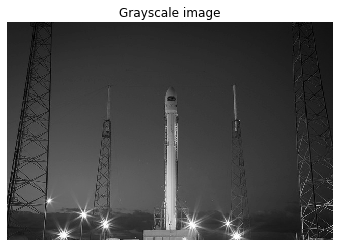

In [5]:
gray_scaled_rocket = color.rgb2gray(rocket)
show_image(gray_scaled_rocket, 'Grayscale image')

In [6]:
import numpy as np
from skimage.filters import threshold_otsu

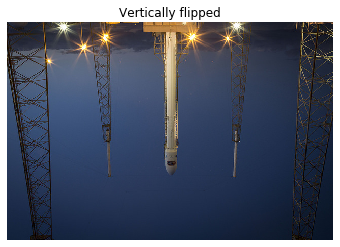

In [7]:
vertically_flipped = np.flipud(rocket)
show_image(vertically_flipped, 'Vertically flipped')

In [8]:
rocket.size

819840

In [9]:
rocket.shape

(427, 640, 3)

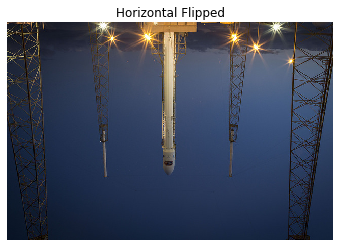

In [10]:
horizontal_flipped = np.fliplr(vertically_flipped)
show_image(horizontal_flipped, 'Horizontal Flipped')

In [11]:
red = rocket[:,:,0]
blue = rocket[:,:,1]
green = rocket[:,:,2]

Text(0.5, 1.0, 'Red Histogram')

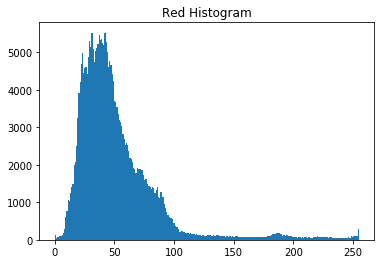

In [12]:
plt.hist(red.ravel(), bins=256)
plt.title('Red Histogram')

**ravel() :** returns contiguous flattened array

Text(0.5, 1.0, 'Blue Histogram')

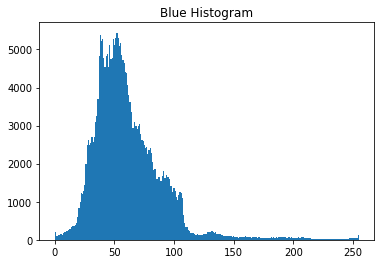

In [13]:
plt.hist(blue.ravel(), bins=256)
plt.title('Blue Histogram')

**Thresholding**

In [14]:
camera = data.camera()

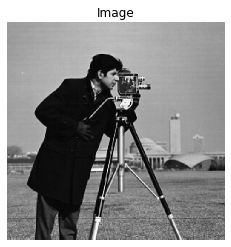

In [15]:
show_image(camera)

In [16]:
camera_gray = color.rgb2gray(camera)

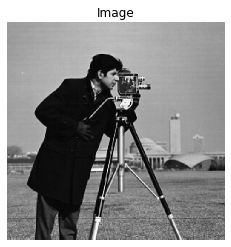

In [17]:
show_image(camera_gray)

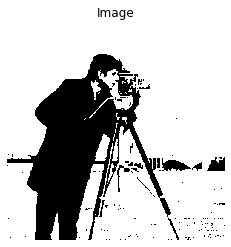

In [18]:
thresh = threshold_otsu(camera_gray)
binary = camera_gray > thresh
show_image(binary)

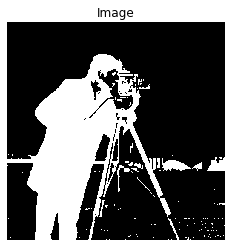

In [19]:
diff_binary = camera_gray < thresh
show_image(diff_binary)

In [20]:
from skimage.filters import threshold_local, try_all_threshold, gaussian, sobel

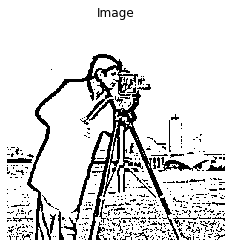

In [21]:
block_size = 35
local_thresh = threshold_local(camera, block_size, offset=10)
binary_local = camera > local_thresh
show_image(binary_local)

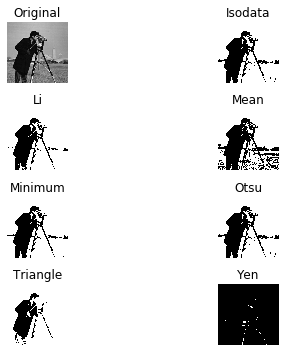

In [22]:
fig, ax = try_all_threshold(camera_gray, verbose=False)
plt.show()

**Edge Detection**

In [23]:
camera_edge = sobel(camera_gray)

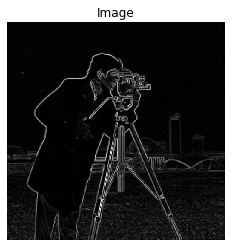

In [24]:
show_image(camera_edge)

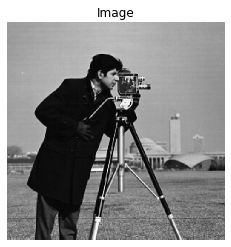

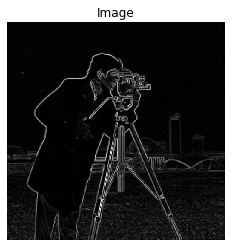

In [25]:
plot_comparison(camera, camera_edge)

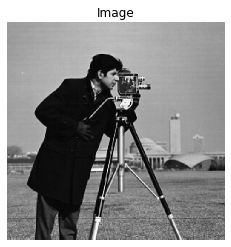

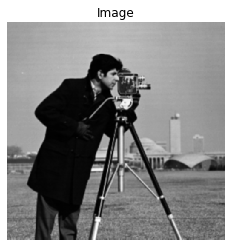

In [26]:
gaussian_camera = gaussian(camera)
plot_comparison(camera, gaussian_camera)

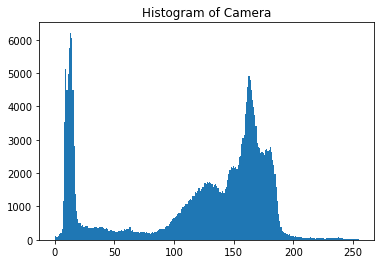

In [27]:
plt.title('Histogram of Camera')
plt.hist(camera.ravel(), bins=256)
plt.show()

**Use histogram equalization to improve the contrast**

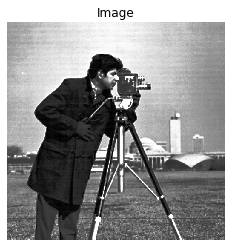

In [28]:
from skimage import exposure
hist_equ_camera = exposure.equalize_hist(camera)
show_image(hist_equ_camera)

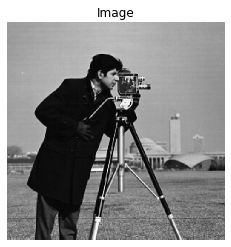

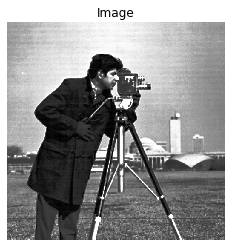

In [29]:
plot_comparison(camera, hist_equ_camera)

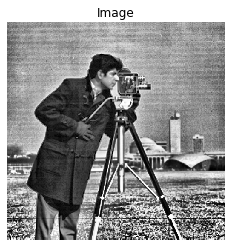

In [30]:
adp_equ_camera = exposure.equalize_adapthist(camera, clip_limit=0.03)
show_image(adp_equ_camera)

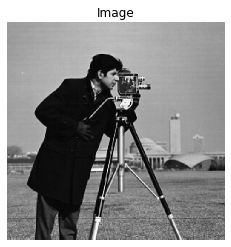

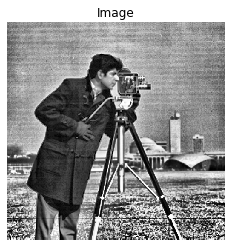

In [31]:
plot_comparison(camera, adp_equ_camera)

In [32]:
coffee = data.coffee()

C:\Users\samya\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


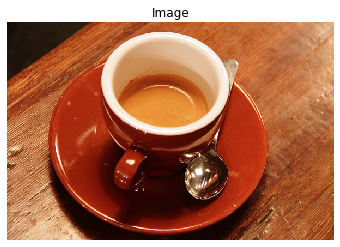

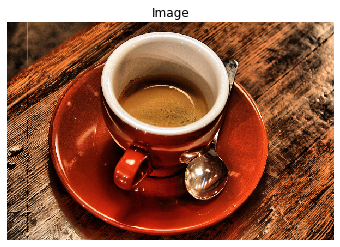

In [33]:
adq_equ_coffee = exposure.equalize_adapthist(coffee, clip_limit=0.03)
plot_comparison(coffee, adq_equ_coffee)

In [34]:
from skimage import transform

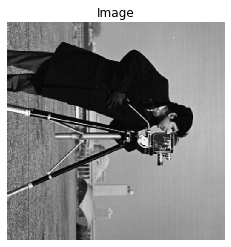

In [35]:
camera_clockwise = transform.rotate(camera, -90)
show_image(camera_clockwise)

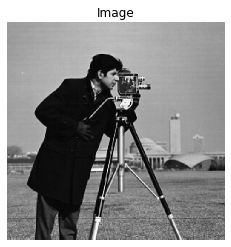

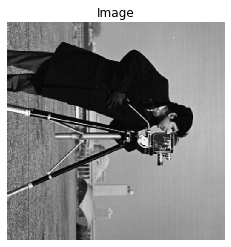

In [36]:
plot_comparison(camera, camera_clockwise)

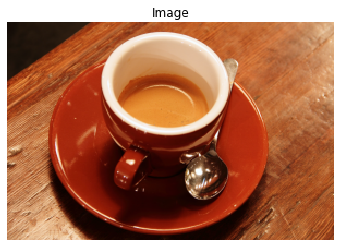

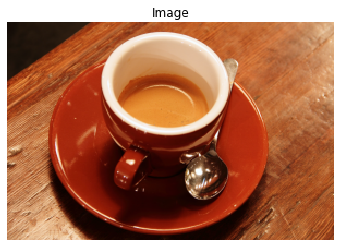

In [37]:
coffee_rescaled = transform.rescale(coffee, 1/2, anti_aliasing=True, multichannel=True)
coffee_rescaled_non_anti = transform.rescale(coffee, 1/2, multichannel=True)
plot_comparison(coffee_rescaled, coffee_rescaled_non_anti)

In [38]:
coffee_rescaled.size

180000

In [39]:
coffee.size

720000

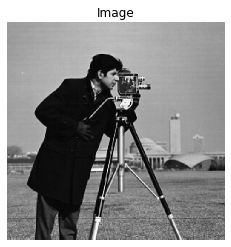

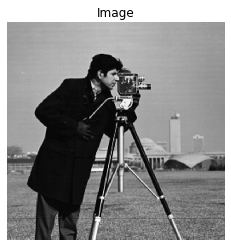

In [40]:
camera_resize = transform.resize(camera, (600, 600), anti_aliasing = True)
plot_comparison(camera, camera_resize)

In [41]:
camera.size

262144

In [42]:
camera_resize.size

360000

In [43]:
camera.shape[0]

512

In [44]:
camera.shape

(512, 512)

In [45]:
from skimage import morphology

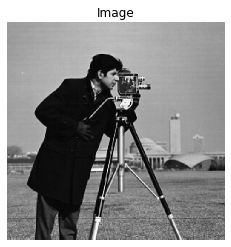

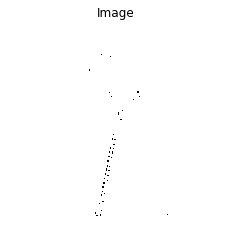

In [46]:
selem = morphology.rectangle(12,6)
eroded_camera = morphology.binary_erosion(camera, selem = selem)
eroded_default_camera = morphology.binary_erosion(camera)
plot_comparison(camera, eroded_default_camera)

In [47]:
from skimage import restoration
from skimage import io

In [48]:
defect_image = io.imread('damaged_astronaut.png')

In [49]:
defect_astro = data.astronaut()

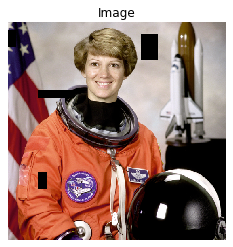

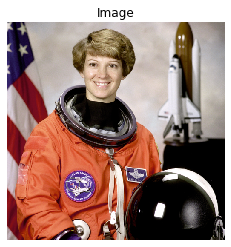

In [50]:
plot_comparison(defect_image, defect_astro)

In [51]:
def get_mask(image):
    mask = np.zeros(image.shape[:-1])
    mask[101:106, 0:240] = 1
    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask

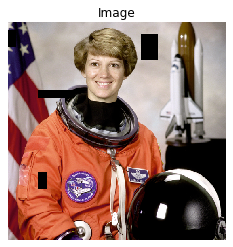

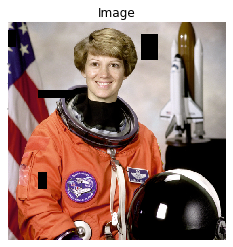

In [52]:
mask = get_mask(defect_image)
restore_image = restoration.inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
plot_comparison(defect_image, restore_image)

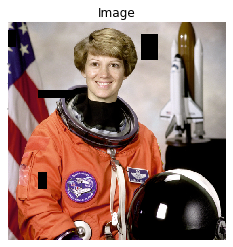

In [53]:
show_image(restore_image)

In [54]:
# restore_image = restoration.inpaint.inpaint_biharmonic(defect_astro, defect_astro, multichannel=True)
# plot_comparison(defect_astro, restore_image)

In [55]:
from skimage import util

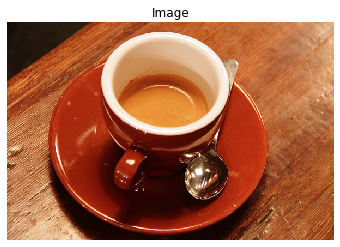

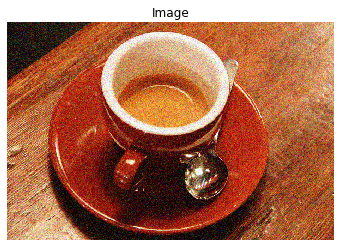

In [56]:
noise_coffee = util.random_noise(coffee)
plot_comparison(coffee, noise_coffee)

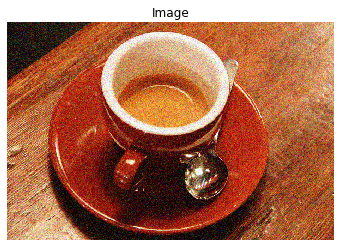

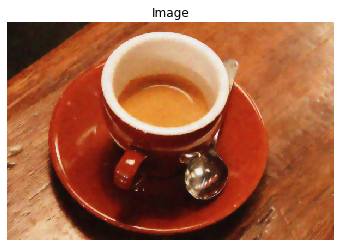

In [57]:
denoise_coffee = restoration.denoise_tv_chambolle(noise_coffee, weight=0.1, multichannel = True)
plot_comparison(noise_coffee, denoise_coffee)

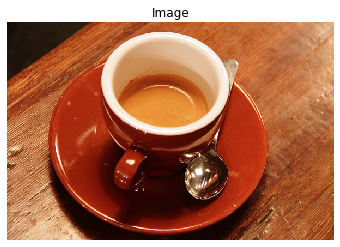

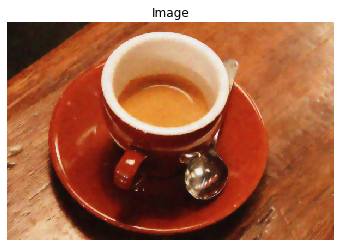

In [58]:
plot_comparison(coffee, denoise_coffee)

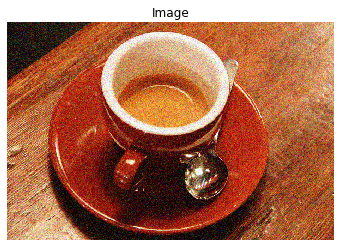

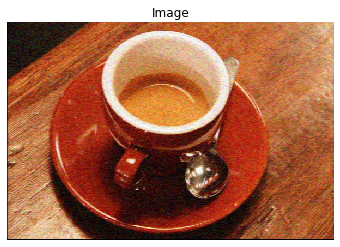

In [59]:
#preserve the edges in the images
denoise_coffee_bilateral = restoration.denoise_bilateral(noise_coffee, multichannel = True)
plot_comparison(noise_coffee, denoise_coffee_bilateral)

In [60]:
from skimage import segmentation

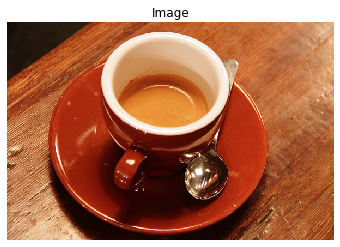

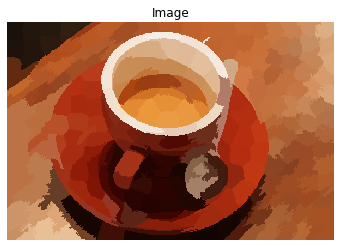

In [61]:
coffee_segments = segmentation.slic(coffee, n_segments=300)
segmented_coffee = color.label2rgb(coffee_segments, coffee, kind='avg')
plot_comparison(coffee, segmented_coffee)

In [62]:
coffee_segments

array([[  0,   0,   0, ...,  17,  17,  17],
       [  0,   0,   0, ...,  17,  17,  17],
       [  0,   0,   0, ...,  17,  17,  17],
       ...,
       [226, 226, 226, ..., 203, 203, 203],
       [226, 226, 226, ..., 203, 203, 203],
       [226, 226, 226, ..., 203, 203, 203]], dtype=int64)

In [63]:
from skimage import measure

In [64]:
coffee_image = color.rgb2gray(coffee)
thresh_coffee = threshold_otsu(coffee_image)
coffee_threshold = coffee_image > thresh_coffee
contours_coffee = measure.find_contours(coffee_threshold, 0.8)

In [65]:
for contour in contours_coffee:
    print(contour.shape)

(922, 2)
(53, 2)
(375, 2)
(7, 2)
(448, 2)
(1807, 2)
(198, 2)
(28, 2)
(33, 2)
(3, 2)
(33, 2)
(25, 2)
(25, 2)
(9, 2)
(5, 2)
(13, 2)
(5, 2)
(5, 2)
(5, 2)
(11, 2)
(13, 2)
(5, 2)
(9, 2)
(9, 2)
(9, 2)
(23, 2)
(7, 2)
(5, 2)
(11, 2)
(13, 2)
(9, 2)
(11, 2)
(5, 2)
(19, 2)
(15, 2)
(13, 2)
(5, 2)
(17, 2)
(5, 2)
(5, 2)
(5, 2)
(21, 2)
(7, 2)
(17, 2)
(105, 2)
(33, 2)
(15, 2)
(11, 2)
(9, 2)
(9, 2)
(5, 2)
(9, 2)
(5, 2)
(7, 2)
(7, 2)
(9, 2)
(19, 2)
(7, 2)
(5, 2)
(5, 2)
(7, 2)
(79, 2)
(5, 2)
(13, 2)
(5, 2)
(13, 2)
(5, 2)
(15, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(13, 2)
(25, 2)
(7, 2)
(39, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(11, 2)
(5, 2)
(5, 2)
(61, 2)
(7, 2)
(5, 2)
(7, 2)
(5, 2)
(15, 2)
(9, 2)
(5, 2)
(61, 2)
(5, 2)
(5, 2)
(31, 2)
(7, 2)
(5, 2)
(51, 2)
(7, 2)
(9, 2)
(5, 2)
(5, 2)
(143, 2)
(27, 2)
(5, 2)
(9, 2)
(5, 2)
(15, 2)
(5, 2)
(5, 2)
(163, 2)
(13, 2)
(7, 2)
(7, 2)
(7, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(15, 2)
(23, 2)
(5, 2)
(5, 2)
(29, 2)
(21, 2)
(5, 2)
(59, 2)
(17, 2)
(5, 2)
(5, 2)
(59, 2)

(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(11, 2)
(5, 2)
(15, 2)
(5, 2)
(5, 2)
(13, 2)
(5, 2)
(27, 2)
(9, 2)
(7, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(13, 2)
(31, 2)
(21, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(13, 2)
(5, 2)
(11, 2)
(5, 2)
(9, 2)
(5, 2)
(58, 2)
(5, 2)
(5, 2)
(5, 2)
(11, 2)
(79, 2)
(49, 2)
(9, 2)
(5, 2)
(13, 2)
(7, 2)
(15, 2)
(7, 2)
(9, 2)
(7, 2)
(5, 2)
(5, 2)
(17, 2)
(27, 2)
(9, 2)
(3, 2)
(21, 2)
(7, 2)
(5, 2)
(7, 2)
(5, 2)
(35, 2)
(13, 2)
(39, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(17, 2)
(5, 2)
(5, 2)
(5, 2)
(13, 2)
(5, 2)
(5, 2)
(17, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(13, 2)
(5, 2)
(5, 2)
(15, 2)
(11, 2)
(5, 2)
(13, 2)
(5, 2)
(7, 2)
(5, 2)
(7, 2)
(19, 2)
(5, 2)
(9, 2)
(5, 2)
(9, 2)
(11, 2)
(5, 2)
(5, 2)
(5, 2)
(11, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(7, 2)
(13, 2)
(335, 2)
(5, 2)
(7, 2)
(13, 2)
(5, 2)
(7, 2)
(5, 2)
(35, 2)
(7, 2)
(9, 2)
(9, 2)
(17, 

In [67]:
from skimage import feature

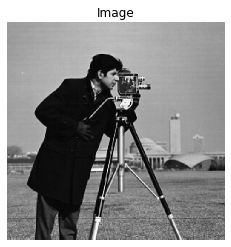

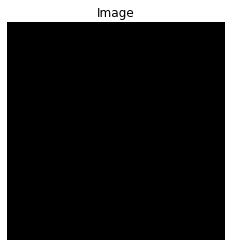

In [68]:
gray_camera = color.rgb2gray(camera)
canny_camera = feature.canny(gray_camera)
plot_comparison(camera, canny_camera)

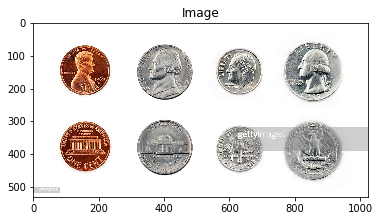

(531, 1024, 3)

In [73]:
coin = io.imread('coin.jpg')
show_image(coin)
coin.shape

In [76]:
mask = np.zeros(coin.shape[:-1])
mask[320:400, 610:1024] = 1
mask[500:520, 0:100] = 1


In [ ]:
# restore_coin = restoration.inpaint.inpaint_biharmonic(coin, mask, multichannel=True)
# plot_comparison(coin, restore_coin)